In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

In [3]:
WT_T0_T1 = pd.read_csv('../figures/direct/WT_T0_T1/top25_tfs.csv', index_col=0, sep=',').set_index('TFs').T
WT_T0_T2 = pd.read_csv('../figures/direct/WT_T0_T2/top25_tfs.csv', index_col=0,sep=',').set_index('TFs').T
MUT_T0_T1 = pd.read_csv('../figures/direct/MUT_T0_T1/top25_tfs.csv', index_col=0,sep=',').set_index('TFs').T
MUT_T0_T2 = pd.read_csv('../figures/direct/MUT_T0_T2/top25_tfs.csv', index_col=0,sep=',').set_index('TFs').T
WT_T0_T1 = WT_T0_T1.rename(index={WT_T0_T1.index[0]: "WT_T0_T1"})
WT_T0_T2 = WT_T0_T2.rename(index={WT_T0_T2.index[0]: "WT_T0_T2"})
MUT_T0_T1 = MUT_T0_T1.rename(index={MUT_T0_T1.index[0]: "MUT_T0_T1"})
MUT_T0_T2 = MUT_T0_T2.rename(index={MUT_T0_T2.index[0]: "MUT_T0_T2"})
WT_T0_T1

TFs,ZNF384,TFAP2A,NR3C1,JUN,HNF1A,ATOH7,SIX1,BCL11B,IRX1,CEBPB,...,HNF4G,PML,ASCL2,CDX1,MAX,NEUROD1,EN1,SMARCA4,CREB5,FOXC2
WT_T0_T1,-4.944431,-4.793782,-4.498563,-4.131877,-4.017891,-3.933676,3.833234,3.772531,-3.760674,-3.720316,...,-3.377922,-3.367464,-3.329817,-3.319639,-3.312475,-3.297722,3.191392,-3.181111,3.110213,-3.083129


In [4]:
all_dfs =[WT_T0_T1,WT_T0_T2,MUT_T0_T1,MUT_T0_T2]

In [7]:
combined_df = pd.concat(all_dfs, ignore_index=False)
#combined_df.index.name=("Pathways")
combined_df = combined_df.rename(columns={"TFs": "Pathways"})
combined_df= combined_df.fillna(0)
combined_df

TFs,ZNF384,TFAP2A,NR3C1,JUN,HNF1A,ATOH7,SIX1,BCL11B,IRX1,CEBPB,...,NFE2,FOSL2,THRB,ERG,MYC,NEUROD2,ETV7,SP3,ISL1,NKRF
WT_T0_T1,-4.944431,-4.793782,-4.498563,-4.131877,-4.017891,-3.933676,3.833234,3.772531,-3.760674,-3.720316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WT_T0_T2,0.000000,-5.876585,-4.939766,-4.397706,0.000000,0.000000,0.000000,3.949841,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MUT_T0_T1,0.000000,-3.288835,0.000000,0.000000,-4.593435,0.000000,0.000000,0.000000,-3.939327,-4.004110,...,3.223597,-3.197279,-3.109366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MUT_T0_T2,0.000000,0.000000,0.000000,0.000000,-5.818121,0.000000,0.000000,0.000000,-3.043016,-3.458259,...,0.000000,0.000000,-2.952235,-3.352139,-3.129601,-3.086951,3.038362,-3.011808,-3.009593,-2.983182


<Figure size 4000x400 with 0 Axes>

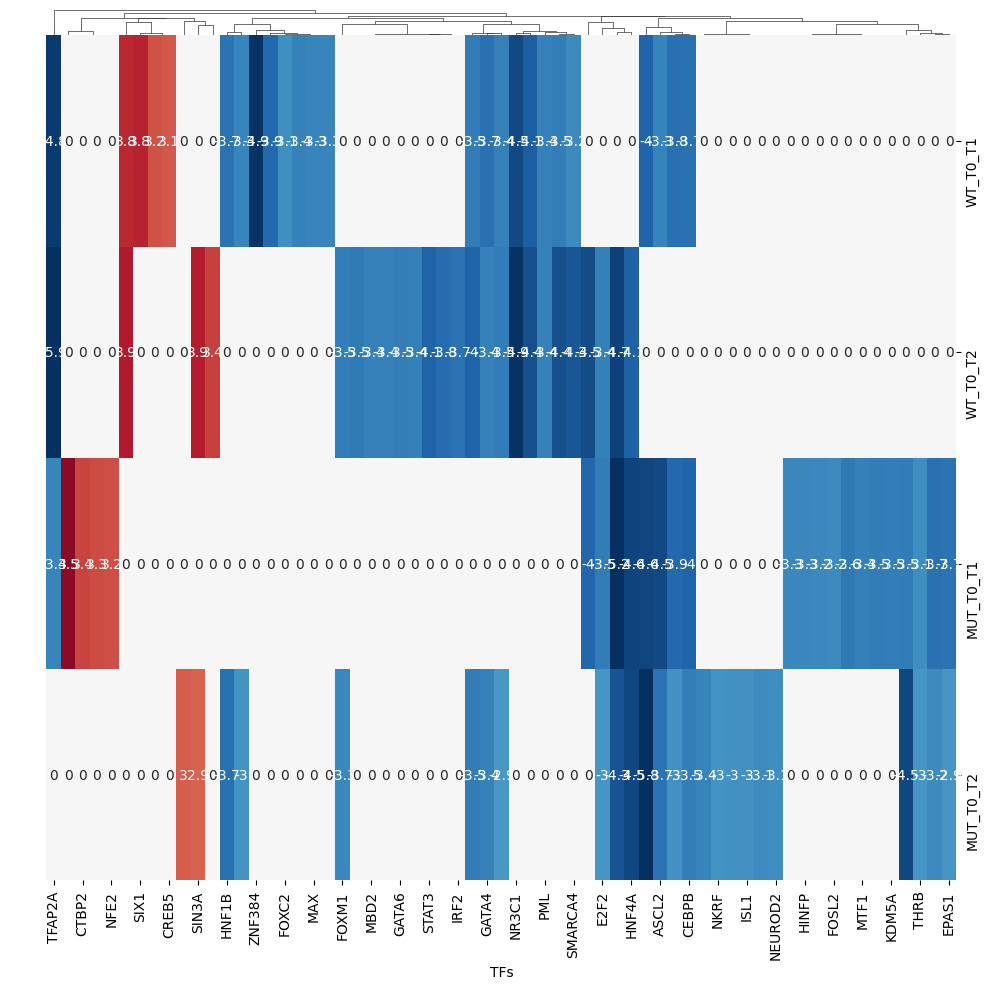

In [19]:
plt.figure(figsize=(40, 4))

# Create the heatmap with hierarchical clustering on the top
Z = linkage(combined_df.T, 'ward')
ax = sns.clustermap(
    combined_df,
    cmap='RdBu_r',
    annot=True,
    vmin=-5,
    vmax=5,
    row_cluster=False,  # Disable row clustering
    col_cluster=True,   # Enable column clustering
    dendrogram_ratio=(0.03),
    #cbar_pos=(0.02, 0.7, 0.05, 0.2)
    cbar_pos=None
)

#plt.title('Pathway Activity')
plt.savefig("../figures/direct/compare/tfs_WT_MUT_heatmap.png")
plt.show()